#Primero montare Google Drive, es donde tengo almacenado mi dataset

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Descomprimire el archivo .zip, que contiene mi dataset

In [18]:
import zipfile
import os

# Ruta del archivo zip en tu Google Drive
zip_file_path = '/content/drive/MyDrive/data.zip'

# Directorio de extracción
extracted_dir_path = '/content/dataset'

# Descomprimir el archivo zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

#Defino las rutas del contenido de las imagenes, ademas de definir el tamaño de las imagenes y numero de clases (deben de ser 3), esto se refiere a las carpetas que contienen las imagenes de cada persona

In [19]:
# Definir rutas para el conjunto de entrenamiento y validación
train_dir = os.path.join(extracted_dir_path, 'data/train')
validation_dir = os.path.join(extracted_dir_path, 'data/valid')

# Utilizar ImageDataGenerator para cargar las imágenes
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale todas las imágenes
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Definir el tamaño de las imágenes y el tamaño del lote
image_size = (150, 150)
batch_size = 32

# Generador de datos de entrenamiento
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical')

# Generador de datos de validación
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical')

Found 260 images belonging to 3 classes.
Found 67 images belonging to 3 classes.


#Defino el modelo que usare, es una red neuronal colvulocional CNN

In [29]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

#Comienzo con el entrenamiento, le dare un total de 13 epocas, anteriormente eso me dio buenos resultados

In [30]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=11,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/11
8/8 [==============================] - 14s 2s/step - loss: 1.1403 - accuracy: 0.3947 - val_loss: 1.1405 - val_accuracy: 0.2500
Epoch 2/11
8/8 [==============================] - 11s 1s/step - loss: 1.0993 - accuracy: 0.3860 - val_loss: 1.1084 - val_accuracy: 0.3594
Epoch 3/11
8/8 [==============================] - 13s 2s/step - loss: 1.0835 - accuracy: 0.3904 - val_loss: 1.1146 - val_accuracy: 0.2812
Epoch 4/11
8/8 [==============================] - 12s 2s/step - loss: 1.0633 - accuracy: 0.4062 - val_loss: 1.0488 - val_accuracy: 0.4688
Epoch 5/11
8/8 [==============================] - 11s 1s/step - loss: 1.0251 - accuracy: 0.5000 - val_loss: 0.9469 - val_accuracy: 0.4688
Epoch 6/11
8/8 [==============================] - 12s 2s/step - loss: 0.9145 - accuracy: 0.5132 - val_loss: 0.7502 - val_accuracy: 0.7188
Epoch 7/11
8/8 [==============================] - 13s 2s/step - loss: 0.7340 - accuracy: 0.6667 - val_loss: 0.8066 - val_accuracy: 0.6250
Epoch 8/11
8/8 [==================

#Imprimire los valores finales de perdida y precision para darme una idea de como le fue

In [31]:
# Obtener los valores finales de pérdida y precisión
train_loss, train_accuracy = model.evaluate(train_generator)
validation_loss, validation_accuracy = model.evaluate(validation_generator)

# Imprimir los valores finales de pérdida y precisión
print("Valores finales de pérdida y precisión en el conjunto de entrenamiento:")
print("Pérdida:", train_loss)
print("Precisión:", train_accuracy)

print("\nValores finales de pérdida y precisión en el conjunto de validación:")
print("Pérdida:", validation_loss)
print("Precisión:", validation_accuracy)

3/3 [==============================] - 1s 289ms/step - loss: 0.4472 - accuracy: 0.8507
Valores finales de pérdida y precisión en el conjunto de entrenamiento:
Pérdida: 0.18173936009407043
Precisión: 0.942307710647583

Valores finales de pérdida y precisión en el conjunto de validación:
Pérdida: 0.447193443775177
Precisión: 0.8507462739944458


#Creo una funcion para preprocesar las imagenes de prueba, esto es por que el modelo espera imagenes de 150x150 como entrada

In [32]:
# Función para cargar y preprocesar la imagen
def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.
    return img_array

#Comenzare con las pruebas para ver como le va al modelo

1/1 [==============================] - 0s 108ms/step


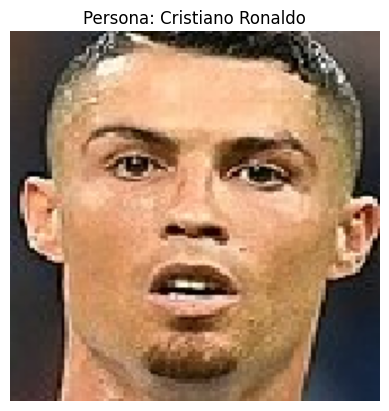

In [33]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# Ruta de la imagen que deseas clasificar
image_path = 'cara1.jpg'

# Cargar y preprocesar la imagen
new_image_array = load_and_preprocess_image(image_path)

# Hacer la predicción
prediction = model.predict(new_image_array)

# Mapear los índices de las clases a los nombres de las clases (es el orden de las carpetas del dataset)
class_names = ['Cristiano Ronaldo', 'Erling Haaland','Kylian Mbappe']

# Obtener el índice de la clase predicha
predicted_class_index = np.argmax(prediction)

# Obtener el nombre de la clase predicha
predicted_class_name = class_names[predicted_class_index]

# Visualizar la imagen junto con la clase predicha
plt.imshow(new_image_array[0])
plt.title("Persona: " + predicted_class_name)
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 48ms/step


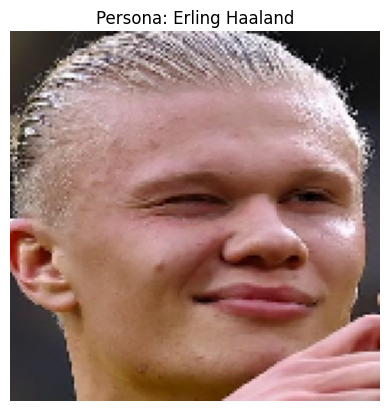

In [34]:
# Ruta de la imagen que deseas clasificar
image_path = 'cara2.jpg'

# Cargar y preprocesar la imagen
new_image_array = load_and_preprocess_image(image_path)

# Hacer la predicción
prediction = model.predict(new_image_array)

# Obtener el índice de la clase predicha
predicted_class_index = np.argmax(prediction)

# Obtener el nombre de la clase predicha
predicted_class_name = class_names[predicted_class_index]

# Visualizar la imagen junto con la clase predicha
plt.imshow(new_image_array[0])
plt.title("Persona: " + predicted_class_name)
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 31ms/step


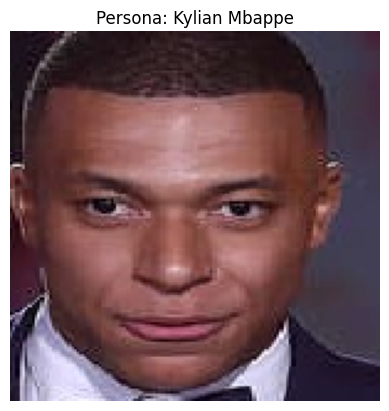

In [35]:
# Ruta de la imagen que deseas clasificar
image_path = 'cara3.jpg'

# Cargar y preprocesar la imagen
new_image_array = load_and_preprocess_image(image_path)

# Hacer la predicción
prediction = model.predict(new_image_array)

# Obtener el índice de la clase predicha
predicted_class_index = np.argmax(prediction)

# Obtener el nombre de la clase predicha
predicted_class_name = class_names[predicted_class_index]

# Visualizar la imagen junto con la clase predicha
plt.imshow(new_image_array[0])
plt.title("Persona: " + predicted_class_name)
plt.axis('off')
plt.show()

#Obviamente al modelo se le facilitara mas acertar si la imagen es solo del rostro de la persona

1/1 [==============================] - 0s 29ms/step


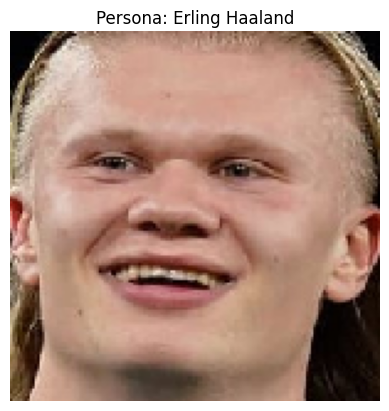

In [36]:
# Ruta de la imagen que deseas clasificar
image_path = 'cara4.jpg'

# Cargar y preprocesar la imagen
new_image_array = load_and_preprocess_image(image_path)

# Hacer la predicción
prediction = model.predict(new_image_array)

# Obtener el índice de la clase predicha
predicted_class_index = np.argmax(prediction)

# Obtener el nombre de la clase predicha
predicted_class_name = class_names[predicted_class_index]

# Visualizar la imagen junto con la clase predicha
plt.imshow(new_image_array[0])
plt.title("Persona: " + predicted_class_name)
plt.axis('off')
plt.show()

#Hare una ultima prueba

1/1 [==============================] - 0s 30ms/step


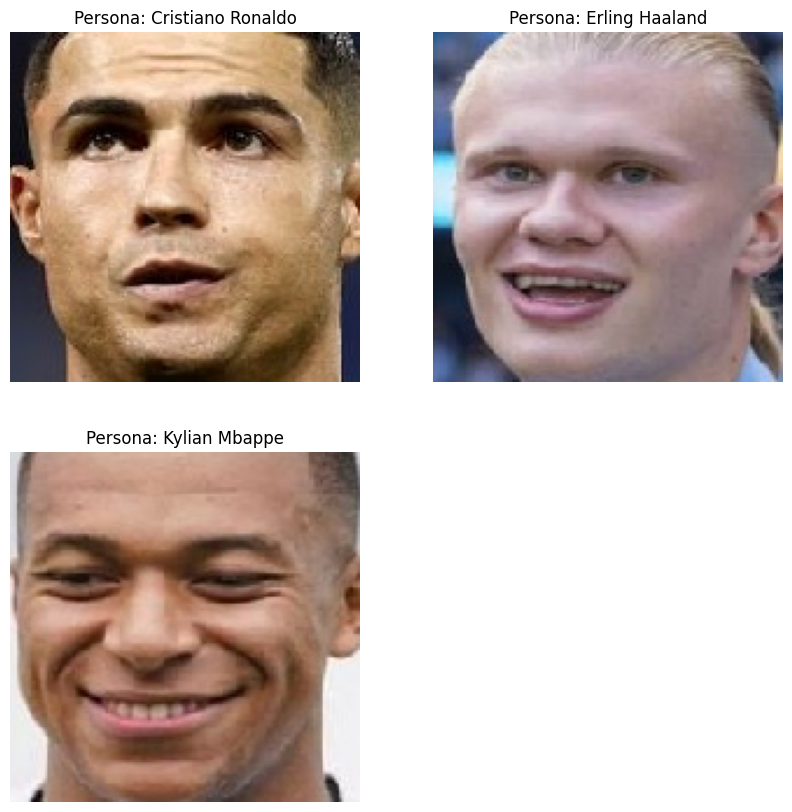

In [37]:
image_path_1 = 'cara5.jpg'
new_image_array_1 = load_and_preprocess_image(image_path_1)
prediction_1 = model.predict(new_image_array_1)
predicted_class_index_1 = np.argmax(prediction_1)
predicted_class_name_1 = class_names[predicted_class_index_1]

image_path_2 = 'cara6.jpg'
new_image_array_2 = load_and_preprocess_image(image_path_2)
prediction_2 = model.predict(new_image_array_2)
predicted_class_index_2 = np.argmax(prediction_2)
predicted_class_name_2 = class_names[predicted_class_index_2]

image_path_3 = 'cara7.jpg'
new_image_array_3 = load_and_preprocess_image(image_path_3)
prediction_3 = model.predict(new_image_array_3)
predicted_class_index_3 = np.argmax(prediction_3)
predicted_class_name_3 = class_names[predicted_class_index_3]

# Crear una nueva figura con cuatro subplots
plt.figure(figsize=(10, 10))

# Subplot 1: Visualizar la primera imagen junto con la clase predicha
plt.subplot(2, 2, 1)
plt.imshow(new_image_array_1[0])
plt.title("Persona: " + predicted_class_name_1)
plt.axis('off')

# Subplot 2: Visualizar la segunda imagen junto con la clase predicha
plt.subplot(2, 2, 2)
plt.imshow(new_image_array_2[0])
plt.title("Persona: " + predicted_class_name_2)
plt.axis('off')

# Subplot 3: Visualizar la tercera imagen junto con la clase predicha
plt.subplot(2, 2, 3)
plt.imshow(new_image_array_3[0])
plt.title("Persona: " + predicted_class_name_3)
plt.axis('off')

# Mostrar la figura con las cuatro imágenes
plt.show()

#A pesar de que el modelo no es el mejor y no esta muy bien entrenado, por que tiene muy pocas imagenes de entrenamiento, se podria decir que es bastante bueno y cumple con lo esperado, lo que hare ahora sera guardar el modelo

In [38]:
# Empezare guardando el modelo en un archivo
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Descargo el modelo, a mi maquina local, por si despues quiero utilizarlo para otro proyecto

In [39]:
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Si quiero usar el modelo en una aplicacion web, puedo hacerlo con la libreria tensorflowjs, que me permite exportar mis modelos de tensorflow a un archivo json

In [40]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 72.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 900.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 73.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 82.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 93.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 85.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 90.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 28.5 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
   

#Como paso final hay que descargar ese .json junto a los archivos .bin que me genero

In [41]:
!tensorflowjs_converter --input_format keras model.h5 model_js

2024-06-16 03:13:55.289047: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
